In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve
from models.train_model import *
from models.evaluate_models import print_metrics

In [33]:
def heatmap(y_true, y_pred, model_name,y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Hợp lệ', 'Độc hại'])
    plt.title(f'Confusion Matrix trên tập test ({model_name})')
    plt.xlabel('Prediction')
    plt.ylabel('Reality')
    plt.show()

In [14]:
def plot_roc_curve(y_test, y_pred, model_name, y_test_proba):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve trên tập test ({model_name})')
    plt.legend()
    plt.show()

In [15]:
from config_module.config import XTRAIN, YTRAIN, XTEST, YTEST, XVAL, YVAL
from numpy import load
import numpy as np
X_train = np.load(XTRAIN)
y_train = np.load(YTRAIN)
X_test = np.load(XTEST)
y_test = np.load(YTEST)
X_val = np.load(XVAL)
y_val = np.load(YVAL)

Training time (s):23.61
Prediction time (s):0.05

Validation on Validation Set:
Accuracy: 0.9426
Test Error (1-Accuracy): 0.0574
Precision: 0.9462
Recall: 0.9396
F1-Score: 0.9429
ROC-AUC: 0.9443
Log Loss: 2.0005

Validation on Test Set:
Accuracy: 0.9422
Test Error (1-Accuracy): 0.0578
Precision: 0.9405
Recall: 0.9433
F1-Score: 0.9419
ROC-AUC: 0.9440
Log Loss: 2.0114


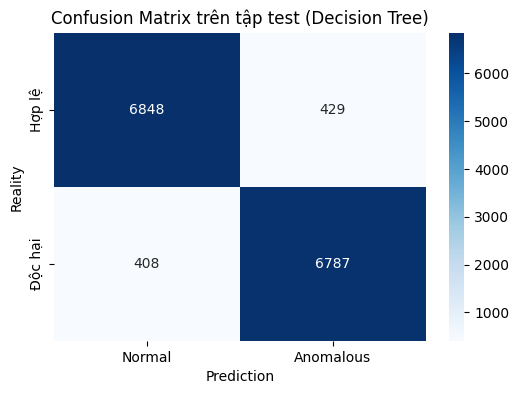

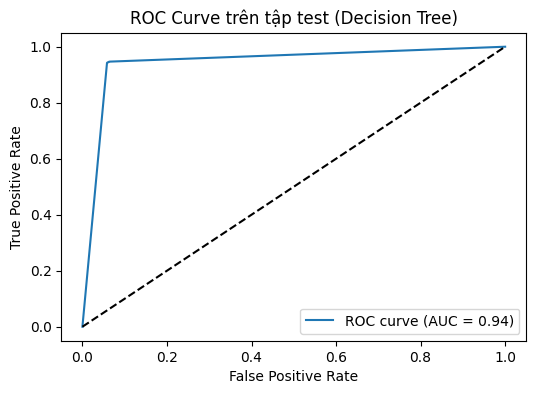

In [ ]:
def train_test_decision_tree():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = decision_tree(X_train, y_train, X_test, X_val)
    print_metrics("Decision Tree", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Decision Tree", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap(y_test, y_test_pred, 'Decision Tree', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Decision Tree', y_test_proba)
    
    
train_test_decision_tree()

In [17]:
def train_test_linear():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = linear_svc(X_train, y_train, X_test, X_val)
    print_metrics("LinearSVC", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("LinearSVC", y_test, y_test_pred, y_test_proba, "Test Set")
   
    heatmap(y_test, y_test_pred, 'Linear SVC', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Linear SVC', y_test_proba)

Training time (s):13.85
Prediction time (s):0.15

Validation on Validation Set:
Accuracy: 0.9444
Test Error (1-Accuracy): 0.0556
Precision: 0.9605
Recall: 0.9279
F1-Score: 0.9439
ROC-AUC: 0.9883
Log Loss: 0.1350

Validation on Test Set:
Accuracy: 0.9462
Test Error (1-Accuracy): 0.0538
Precision: 0.9532
Recall: 0.9377
F1-Score: 0.9454
ROC-AUC: 0.9883
Log Loss: 0.1340


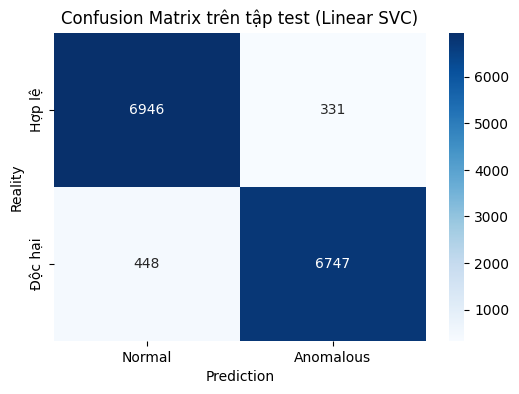

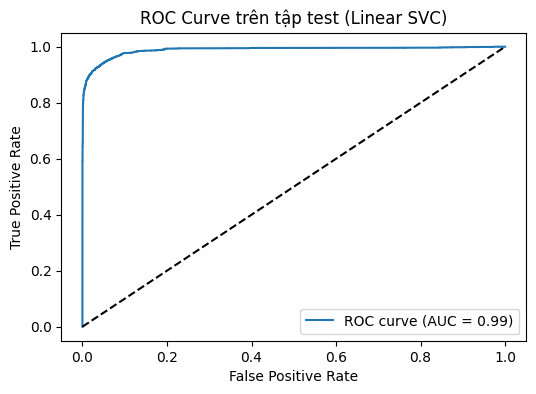

In [18]:
train_test_linear()

Training time (s):0.03
Prediction time (s):28.05

Validation on Validation Set:
Accuracy: 0.9529
Test Error (1-Accuracy): 0.0471
Precision: 0.9512
Recall: 0.9554
F1-Score: 0.9533
ROC-AUC: 0.9881
Log Loss: 0.2922

Validation on Test Set:
Accuracy: 0.9453
Test Error (1-Accuracy): 0.0547
Precision: 0.9373
Recall: 0.9539
F1-Score: 0.9455
ROC-AUC: 0.9863
Log Loss: 0.3206


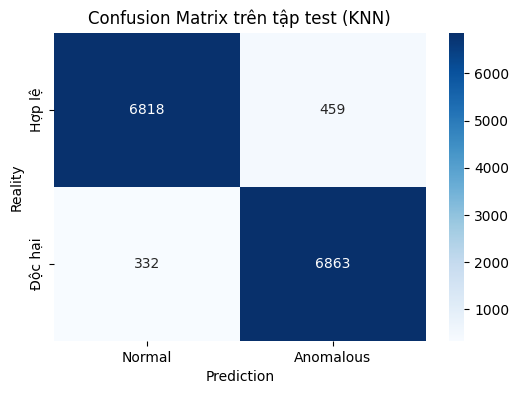

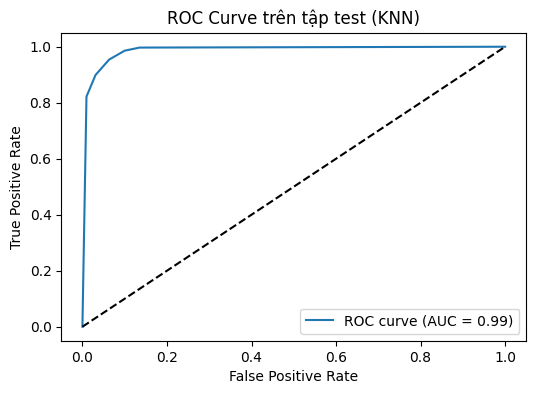

In [34]:

def train_test_knn():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = knn(X_train, y_train, X_test, X_val)
    print_metrics("KNN", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("KNN", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap(y_test, y_test_pred, 'KNN', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'KNN', y_test_proba)

train_test_knn()

Training time (s):0.29
Prediction time (s):0.30

Validation on Validation Set:
Accuracy: 0.8077
Test Error (1-Accuracy): 0.1923
Precision: 0.8560
Recall: 0.7432
F1-Score: 0.7956
ROC-AUC: 0.9096
Log Loss: 6.6855

Validation on Test Set:
Accuracy: 0.8044
Test Error (1-Accuracy): 0.1956
Precision: 0.8446
Recall: 0.7433
F1-Score: 0.7907
ROC-AUC: 0.9043
Log Loss: 6.7770


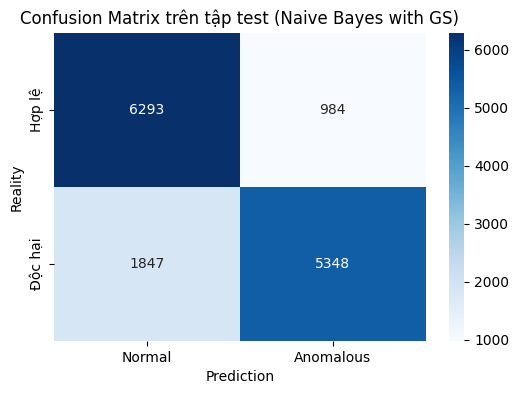

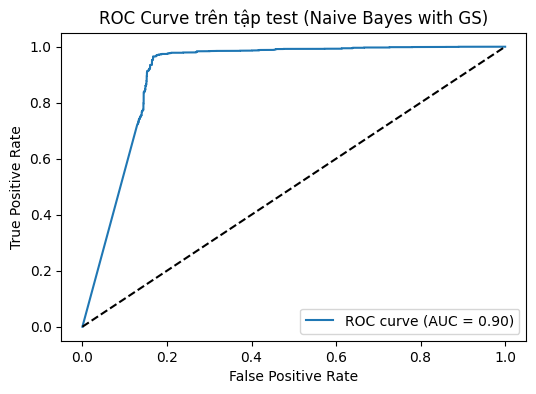

In [38]:

def train_test_naive_bayes():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = naive_bayes_opt_gs(X_train, y_train, X_test, X_val)
    print_metrics("Naive Bayes", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Naive Bayes", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap(y_test, y_test_pred, 'Naive Bayes with GS', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Naive Bayes with GS', y_test_proba)
train_test_naive_bayes()

CSIC dataset
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Tranining time (s): 260.00

Best hyperparameter : {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best recall on cross-validation: 0.9922661776971261
Prediction time (s): 0.52

Validation on Validation Set:
Accuracy: 0.9453
Test Error (1-Accuracy): 0.0547
Precision: 0.9088
Recall: 0.9908
F1-Score: 0.9480
ROC-AUC: 0.9949
Log Loss: 0.1201

Validation on Test Set:
Accuracy: 0.9389
Test Error (1-Accuracy): 0.0611
Precision: 0.8969
Recall: 0.9911
F1-Score: 0.9416
ROC-AUC: 0.9943
Log Loss: 0.1240


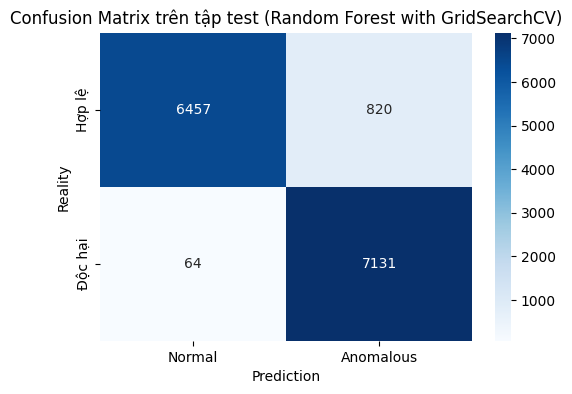

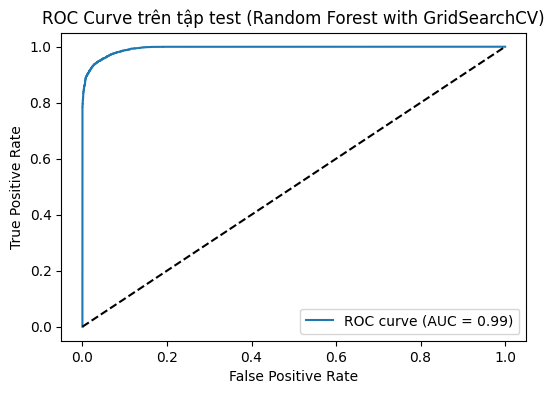

In [21]:
def train_test_rf():
    print("CSIC dataset")
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = random_forest_grid_search(X_train, y_train, X_test, X_val)
    print_metrics("Random Forest", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Random Forest", y_test, y_test_pred, y_test_proba, "Test Set")
    # print("ECML dataset")
    # y_test_pred_1, y_test_proba_1, y_val_pred_1, y_val_proba_1, best_model = random_forest_grid_search(X_train_1, y_train_1, X_test_1, X_val_1)
    # print_metrics("Random Forest", y_val_1, y_val_pred_1, y_val_proba_1, "Validation Set")
    # print_metrics("Random Forest", y_test_1, y_test_pred_1, y_test_proba_1, "Test Set")
    heatmap(y_test, y_test_pred, 'Random Forest with GridSearchCV', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Random Forest with GridSearchCV', y_test_proba)
train_test_rf()

Training time (s):6.67
Prediction time (s):0.16

Validation on Validation Set:
Accuracy: 0.9471
Test Error (1-Accuracy): 0.0529
Precision: 0.9142
Recall: 0.9877
F1-Score: 0.9495
ROC-AUC: 0.9942
Log Loss: 0.1090

Validation on Test Set:
Accuracy: 0.9410
Test Error (1-Accuracy): 0.0590
Precision: 0.9039
Recall: 0.9861
F1-Score: 0.9432
ROC-AUC: 0.9936
Log Loss: 0.1147


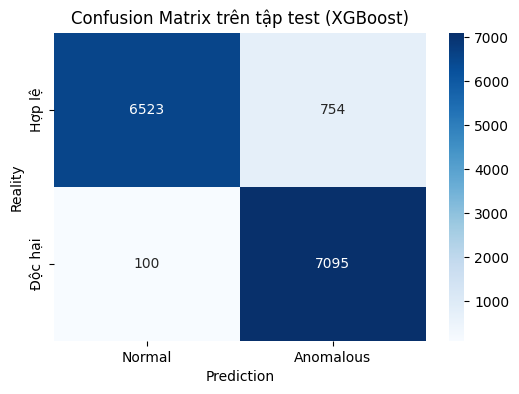

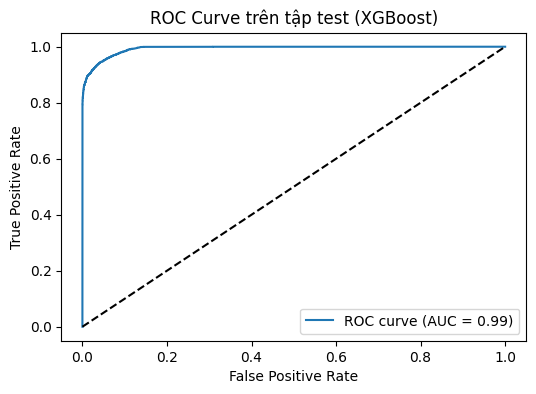

In [25]:
def train_test_xgboost():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = xgboost(X_train, y_train, X_test, X_val)
    print_metrics("XGboot", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("XGboot", y_test, y_test_pred, y_test_proba, "Test Set")   
    heatmap(y_test, y_test_pred, 'XGBoost', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'XGBoost', y_test_proba)
train_test_xgboost()

In [43]:
from config_module.config import JSON_FILE

with open(JSON_FILE, 'r', encoding='utf-8') as jsonfile:
	print(jsonfile.read())

ImportError: cannot import name 'JSON_FILE' from 'config_module.config' (c:\Users\Acer\source\repos\homework\Python\WebVulnerabilities\config_module\config.py)